# Predicción de Potabilidad del Agua

En esta ocasión se busca desarrollar un proceso de GridSearch con el fin de buscar los mejores hiperparámetros de distintos modelos dentro de un rango de valores definidos por nosotros mismos. Igualmente, se busca que usted aplique y comprenda los siguientes modelos:

- Árboles de decisión
- Bosques de decisión
- AdaBoost
- XGBoost
- Bagging

Se sugiere fuertemente leer la documentación entregada en los artículos de los links.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno. La fecha límite de entrega es el día **8 de noviembre** y se realizará a través de Bloque Neón.

In [17]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

Lectura de CSV y borrado de filas incompletas.

In [2]:
df = pd.read_csv('waterPotability/water_potability.csv').dropna()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Gráfica de proporción de clases. A continuación puede observar una desproporción entre los datos, por lo que se está lidiando con un problema desbalanceado.

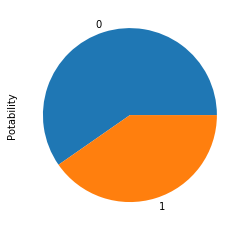

In [3]:
df['Potability'].value_counts().plot(kind='pie')

### Manejo de Datos Desbalanceados: Remuestreo

In [4]:
from sklearn.utils import resample
from sklearn.utils import shuffle

zero  = df[df['Potability']==0]   # clase 0
one = df[df['Potability']==1]  # clase 1

df_minority_upsampled = resample(one, replace = True, n_samples = 1200)
df = pd.concat([zero, df_minority_upsampled])

df = shuffle(df) # shuffling so that there is particular sequence

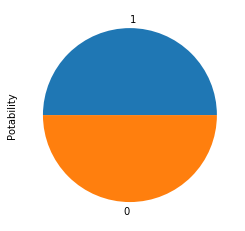

In [5]:
df['Potability'].value_counts().plot(kind='pie')

In [6]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

## Prueba de Modelos y GridSearch/RandomizedSearch

A continuación, realizaremos un procedimiento de búsqueda del mejor modelo y sus correspondientes hiperparámetros. Estos procedimientos se conocen como GridSearch/RandomizedSearch. Puede encontrar más información en los siguientes enlaces:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
- https://www.mygreatlearning.com/blog/gridsearchcv/
- https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=22)

### Definición de Parámetros de GridSearch/RandomizedSearch



In [9]:
#Hyperparameter tuning ;)

lr = LogisticRegression(random_state=42)

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)

#parameters for decision tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)
#grid search decision tree for 5 fold cv
#"gini" for the Gini impurity and “entropy” for the information gain.
#min_samples_leaf: The minimum number of samples required to be at a leaf node, have the effect of smoothing the model

#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#parameters for AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

### Búsqueda de Hiperparámetros

A continuación se debe realizar el proceso de GridSearch. Esta operación puede tardar.

In [10]:
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 400, 'learning_rate': 0.2}


In [37]:
print("Mejores parámetros Árbol de Decisión:", grid_dt.best_params_)
print("Mejores parámetros Random Forest:", grid_rf.best_params_)
print("Mejores parámetros AdaBoost:", grid_ada.best_params_)
print("Mejores parámetros XGBoost:", rs_xgb.best_params_)

Mejores parámetros Árbol de Decisión: {'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 1}
Mejores parámetros Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
Mejores parámetros AdaBoost: {'learning_rate': 1, 'n_estimators': 600}
Mejores parámetros XGBoost: {'n_estimators': 400, 'learning_rate': 0.2}


In [12]:
grid_dt.best_params_

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 1}

In [13]:
#let's also apply bagging and boosting
bagging = BaggingClassifier(DecisionTreeClassifier(criterion=grid_dt.best_params_['criterion'], max_depth=grid_dt.best_params_['max_depth'], min_samples_leaf=grid_dt.best_params_['min_samples_leaf'], random_state=42),
                           n_estimators = 100, random_state = 42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=22,
                                                        random_state=42),
                  n_estimators=100, random_state=42)

Métricas de Evaluación:

In [34]:
classifiers = [('Regresión Logística', lr),
               ('Árbol de Decisión', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('Bagging', bagging), ('XGBoost', xgb)]

In [35]:
from sklearn.metrics import accuracy_score

classifier_names = []
classifier_acc = []
for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    classifier_names.append(classifier_name)
    classifier_acc.append(accuracy)

Regresión Logística : 0.55
Árbol de Decisión : 0.81
Random Forest : 0.84
AdaBoost : 0.59
Bagging : 0.84
XGBoost : 0.82


# Resultados Preliminares

<BarContainer object of 6 artists>

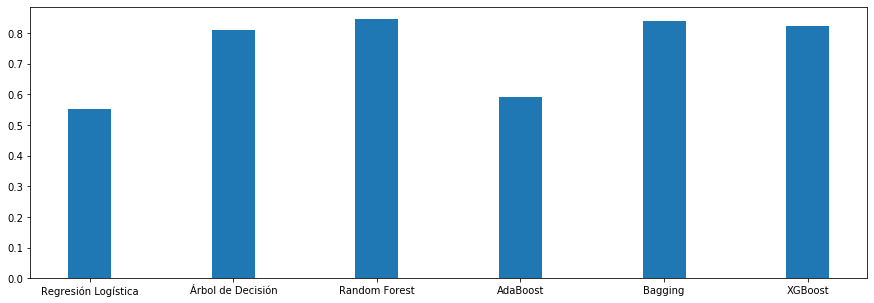

In [36]:
plt.figure(figsize=(15,5))
plt.bar(classifier_names, classifier_acc, width=0.3)

# Análisis de Resultados

Ahora usted utilizará la función `classication_report` 

### Random Forest

In [16]:
from sklearn.metrics import classification_report

y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       225
           1       0.88      0.82      0.85       255

    accuracy                           0.85       480
   macro avg       0.85      0.85      0.85       480
weighted avg       0.85      0.85      0.85       480



### Árbol de Decisión

In [30]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       225
           1       0.81      0.86      0.83       255

    accuracy                           0.82       480
   macro avg       0.82      0.81      0.81       480
weighted avg       0.82      0.82      0.82       480



### XGBoost

In [32]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       225
           1       0.83      0.84      0.83       255

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



### Bagging de Árboles de Decisión

In [33]:
y_pred_bagging = bagging.predict(X_test)
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       225
           1       0.86      0.82      0.84       255

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480

